# **Latar Belakang**

Amazon Web Service Software-as-a-Service (AWS-SaaS) adalah model bisnis dan perangkat lunak yang memungkinkan organisasi menyediakan penawaran kepada pelanggan dengan cara yang berpusat pada layanan dan minim hambatan.



## Pernyataan Masalah

Perusahaan bermaksud untuk mencari tahu berdasarkan data historis penjualan dari tahun 2020 hingga 2023:

1. Berapa keuntungan Total per tahunnya? Apa trend keuntungan per tahunnya?
2. Segmen customer dan customer mana yang paling menguntungkan dan merugikan?
3. Berapa profit dan trend profit yang dihasilkan suatu customer per tahunnya
4. Apakah diskon berpengaruh terhadap profit dan kuantitas penjualan

## Tujuan

1. Menentukan berapa keuntungan total yang diterima perusahaan secara total dan per tahunnya, serta trendnya

2. Menentukan Customer-customer yang paling menguntungkan dan merugikan berdasarkan profit yang dihasilkan

3. Menghitung profit per tahun dari masing-masing customer dan menganalisa trend yang terjadi dari tahun ke tahun

4. Membandingkan pemberian diskon terhadap keuntungan dan kuantitas pemesanan


# **Data**

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from operator import attrgetter

## Load Data

In [492]:
df = pd.read_csv('SaaS-Sales.csv')
df.head(3)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.0,6.8714


pada dataset ini tiap baris menjelaskan detail suatu transaksi. kolom-kolom yang terdapat pada dataset adalah :

- `Row ID`        : Nilai pengenal unik tiap transaksi

- `Order ID`      : Nilai pengenal unik tiap pemesanan

- `Order Date`    : Tanggal pemesanan

- `Date Key`      : Tanggal pemesanan dalam format (YYYYMMDD)

- `Contact Name`  : Nama orang yang melakukan pemesanan

- `Country`       : Negara dimana pemesanan dilakukan

- `City`          : Kota dimana pemesanan dilakukan

- `Region`        : Daerah dimana pemesanan dilakukan

- `Subregion`     : Sub-daerah dimana pemesanan dilakukan

- `Customer`      : Nama perusahaan yang melakukan pemesanan

- `Customer ID`   : Nilai pengenal unik tiap Customer

- `Industry`      : Industri dimana Customer bergerak

- `Segment`       : Segmentasi Customer

- `Product`       : Produk yang dipesan

- `License`       : License key untuk produk tersebut

- `Sales`         : Total pendapatan pada transaksi

- `Quantity`      : Total jumlah produk pada transaksi

- `Discount`      : Diskon yang diberikan pada transaksi

- `Profit`        : Keuntungan yang diambil pada transaksi

## Data Understanding and Cleaning

### Data Type Conversion

Sebelum digunakan, dataset ini diperiksa terlebih dahulu tipe data tiap kolomnya dan diubah sesuai dengan kebutuhan sehingga data bisa digunakan

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

disini ada beberapa kolom yang perlu disesuaikan yaitu:
- `Row ID` : (int) --> (str)
- `Customer ID` : (int) --> (str)
- `Order Date` : (str) --> (DateTime)

Kolom `Date Key` dapat di drop karena memiliki arti yang sama dengan `Order Date`

In [494]:
df = pd.read_csv(
    'SaaS-Sales.csv',
    dtype = {'Row ID': str, 'Customer ID': str},
    parse_dates= ['Order Date']
    ).drop(columns='Date Key')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   object        
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

### Data Unik tiap Kolom

In [495]:
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
3,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
4,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
5,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
6,Region,3,"[EMEA, AMER, APJ]"
7,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
8,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
9,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."


### Nilai Duplikat

In [496]:
df.duplicated().sum()

0

Tidak ada nilai duplikat pada dataset ini

### Nilai Kosong

In [497]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak ada data yang kosong, sehingga tidak perlu pengisian data kosong

### Distribusi Data

Text(0.5, 1.0, 'Quantity Distribution')

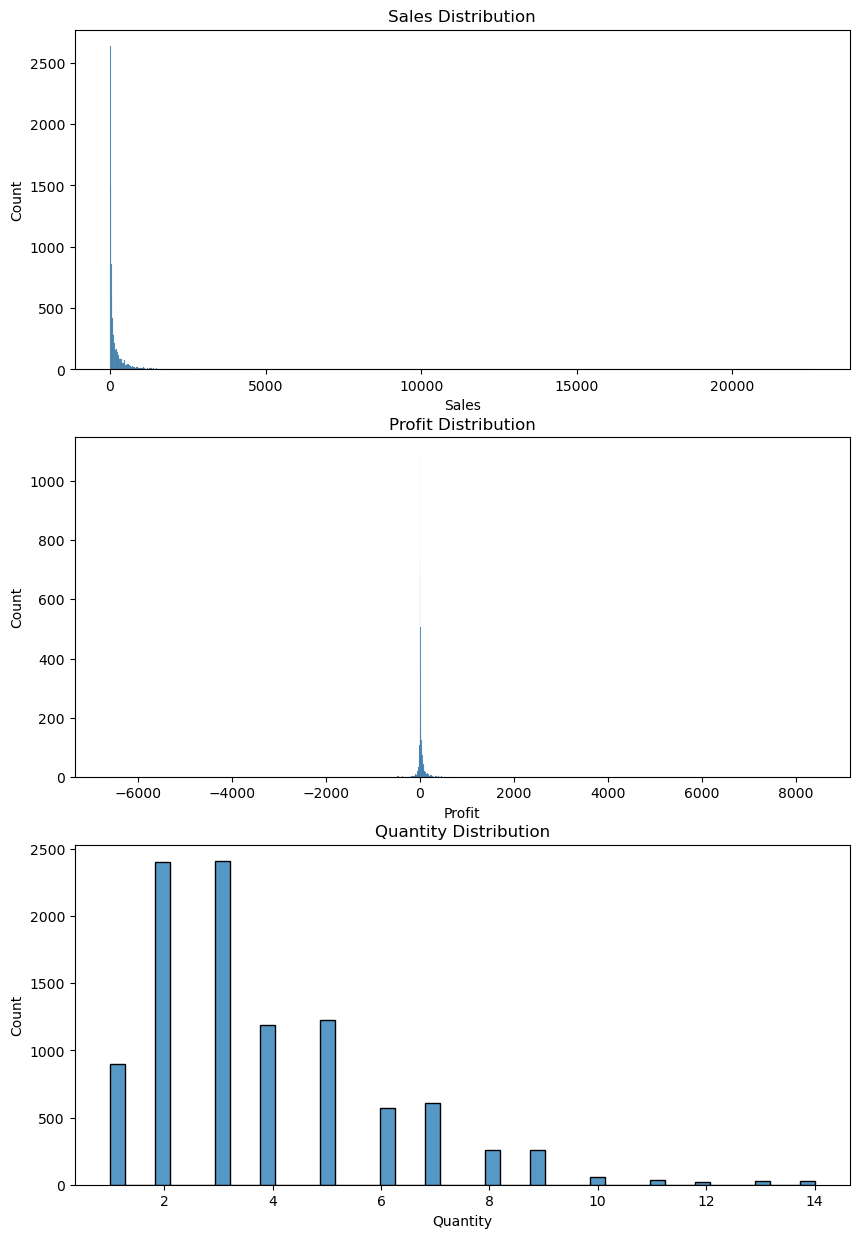

In [498]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.histplot(
    data=df,
    x= 'Sales'
)
plt.title('Sales Distribution')

plt.subplot(3,1,2)
sns.histplot(
    data=df,
    x= 'Profit'
)
plt.title('Profit Distribution')

plt.subplot(3,1,3)
sns.histplot(
    data=df,
    x= 'Quantity'
)
plt.title('Quantity Distribution')

- Persebaran Sales dan Profit memiliki persebaran dengan outliers yang ekstrim
- Persebaran Quantity tidak terdistribusi normal
- Melihat persebaran yang ekstrim, data-data sales, profit dan quantity sebaiknya tidak digunakan untuk analisa yang memerlukan central tendency

In [499]:
df[['Sales','Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


### Penambahan Kolom Baru 

# **Data Analysis**

### Persebaran Transaksi

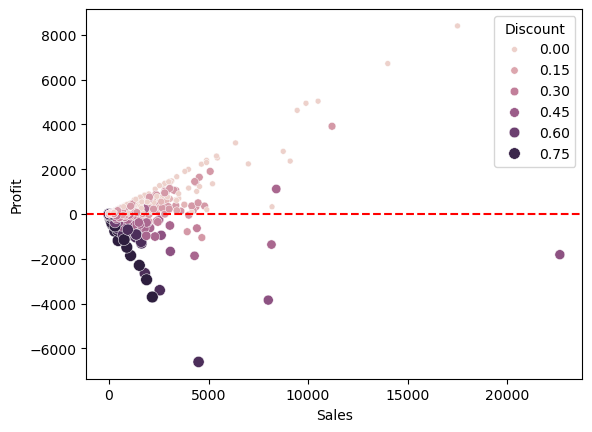

In [500]:
sns.scatterplot(
    data = df,
    x = 'Sales',
    y = 'Profit',
    hue='Discount',
    size='Discount' 
)
plt.axhline(y=0, color='r', linestyle='--')

- Scatterplot menunjukkan hubungan antara `Sales` dan `Profit` dengan warna yang menunjukkan `Discount`.
- Sebagian besar transaksi menghasilkan profit positif, namun ada beberapa transaksi yang menghasilkan kerugian.
- Diskon yang lebih tinggi cenderung menghasilkan profit yang lebih rendah atau bahkan kerugian.
- Tidak ada pola yang jelas antara `Sales` dan `Profit`, menunjukkan bahwa faktor lain mungkin mempengaruhi profitabilitas transaksi.

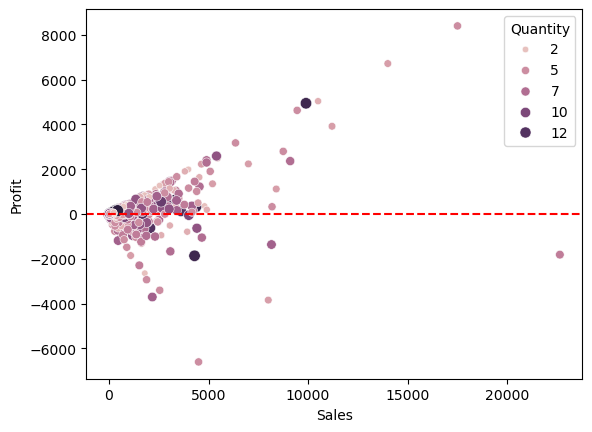

In [501]:
sns.scatterplot(
    data = df,
    x = 'Sales',
    y = 'Profit',
    hue='Quantity',
    size='Quantity' 
)
plt.axhline(y=0, color='r', linestyle='--')

- Transaksi dengan jumlah `Quantity` yang lebih tinggi cenderung menghasilkan profit yang lebih tinggi.

##### Heatmap korelasi tiap kolom

<Axes: >

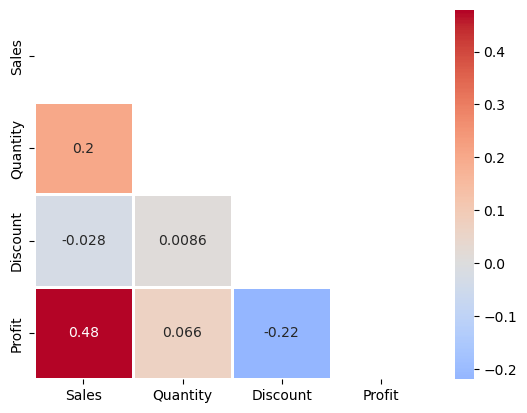

In [502]:
sns.heatmap(data   = df.corr(numeric_only=True),
            annot  = True,
            cmap   = 'coolwarm',
            center = 0,
            linewidths = 2,
            mask=np.triu(df.corr(numeric_only=True)))

- Ada korelasi ringan antara `Discount` dengan `Profit`, dimana semakin besar `Discount` maka `Profit` akan semakin kecil
- ada korelasi ringan antara `Quantity` dengan `Sales`, dimana semakin tinggi `Quantity`, `Sales` akan meningkat

#### Persentase transaksi yang profit dan loss

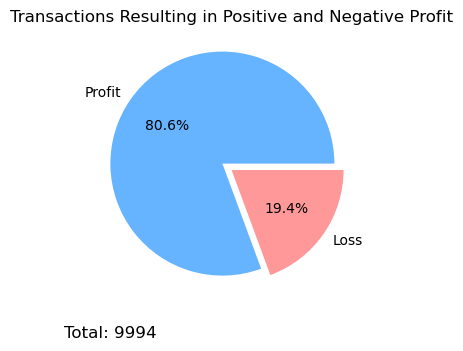

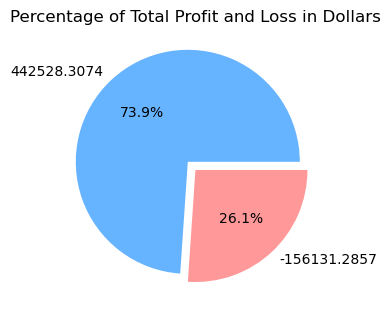

In [503]:
# Pie chart persentase total transaksi yang menghasilkan profit dan loss
profit_counts = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss').value_counts()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.pie(profit_counts, labels=profit_counts.index, autopct='%1.1f%%', startangle=0, colors=['#66b3ff','#ff9999'], explode=(0.1, 0))
plt.title('Transactions Resulting in Positive and Negative Profit')

total_transactions = profit_counts.sum()
plt.text(-1.5, -1.5, f'Total: {total_transactions}', fontsize=12, color='black')

# Pie chart persentase total profit
total_profit = df[df['Profit'] > 0]['Profit'].sum()
total_loss = df[df['Profit'] < 0]['Profit'].sum()

profit_loss_data = [total_profit, abs(total_loss)]
labels = [total_profit, total_loss]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.pie(profit_loss_data, labels=labels, autopct='%1.1f%%', startangle=0, colors=colors, explode=(0.1, 0))
plt.title('Percentage of Total Profit and Loss in Dollars')
plt.show()



- Pie chart pertama menunjukkan bahwa sebagian besar transaksi (sekitar 80.7%) menghasilkan profit, sementara sisanya (sekitar 19.3%) menghasilkan kerugian. Hal ini menunjukkan bahwa mayoritas transaksi yang dilakukan oleh perusahaan menguntungkan.

- Pie chart kedua menunjukkan distribusi total profit dan total loss dalam dolar. Total profit yang dihasilkan adalah sekitar $442,528.31, sedangkan total loss adalah sekitar $156,131.29. Ini menunjukkan bahwa meskipun ada transaksi yang merugi, total profit yang dihasilkan jauh lebih besar daripada total loss, yang berarti perusahaan secara keseluruhan masih menguntungkan.

### Keuntungan Total Perusahaan per Tahun

In [504]:
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter
df['Year-Quarter'] = df['Year'].astype(str) + 'Q' + df['Quarter'].astype(str)
total_profit_per_year = df.groupby(['Year','Year-Quarter'])[['Profit','Sales']].sum().reset_index()

total_profit_per_year['Profit Margin'] = total_profit_per_year['Profit'] / total_profit_per_year['Sales']
total_profit_per_year


,Year,Year-Quarter,Profit,Sales,Profit Margin
0,2020,2020Q1,3811.2290,74447.7960,0.051193
1,2020,2020Q2,11204.0692,86538.7596,0.129469
2,2020,2020Q3,12804.7218,143633.2123,0.089149
3,2020,2020Q4,21723.9541,179627.7302,0.120939
4,2021,2021Q1,9264.9416,68851.7386,0.134564
5,2021,2021Q2,12190.9224,89124.1870,0.136786
6,2021,2021Q3,16853.6194,130259.5752,0.129385
7,2021,2021Q4,23309.1203,182297.0082,0.127863
8,2022,2022Q1,11446.3415,92596.4190,0.123615
9,2022,2022Q2,16084.9055,135370.1130,0.118822


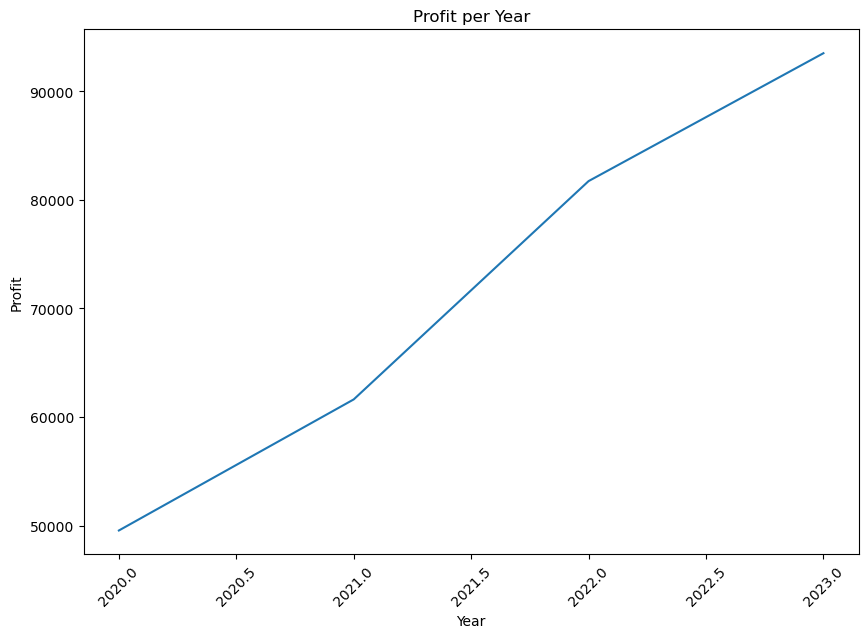

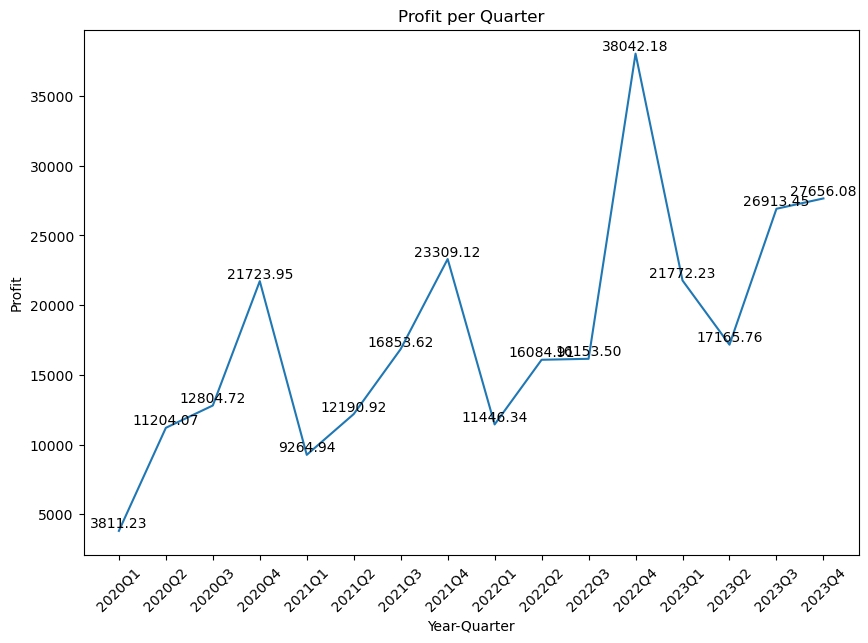

In [505]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1) # by year
sns.lineplot(
    data=total_profit_per_year,
    x='Year',
    y='Profit',
    estimator='sum',
    errorbar=None
)
plt.title('Profit per Year')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,15))
plt.subplot(2,1,2) # by quarter
sns.lineplot(
    data=total_profit_per_year,
    x='Year-Quarter',
    y='Profit',
    estimator='sum',
    errorbar=None
)
plt.title('Profit per Quarter')
plt.xticks(rotation=45)

# Annotate
for x, y in zip(total_profit_per_year['Year-Quarter'], total_profit_per_year['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

- Ada trend positif tiap tahunya
- Dalam 1 tahun terdapat pola naik dari awal tahun (Q1) sampai akhir tahun (Q4), lalu akan turun drastis pada Q1 tahun selanjutnya, menunjukkan bahwa ada pola penurunan penjualan setiap awal tahun

### Performa Customer

#### Performa berdasarkan Industry

In [506]:
df['Discount Amount'] = df['Sales'] * df['Discount']
customer_industry = df.groupby('Industry').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount Amount': 'sum'
}).reset_index()

customer_industry = customer_industry.sort_values(by='Profit', ascending=False)
customer_industry['Profit Margin'] = customer_industry['Profit'] / customer_industry['Sales']*100
customer_industry

,Industry,Sales,Profit,Quantity,Discount Amount,Profit Margin
3,Finance,474150.4844,50348.9696,8007,69005.498138,10.618774
2,Energy,304644.1409,45282.3137,4920,38622.598203,14.864003
5,Manufacturing,295192.3812,38413.1064,4586,41453.001784,13.012906
1,Consumer Products,224044.1422,37018.0077,3870,26857.747224,16.522640
4,Healthcare,273183.2882,31969.0932,4022,44642.174384,11.702434
7,Retail,223072.0720,30207.8208,3693,28350.276400,13.541731
8,Tech,263169.0277,24615.0436,4816,40553.181159,9.353321
0,Communications,120962.2365,13976.3410,2169,16782.047775,11.554301
9,Transportation,90191.3276,7402.6967,1377,14315.187082,8.207770
6,Misc,28591.7596,7163.6290,413,2000.422192,25.054873


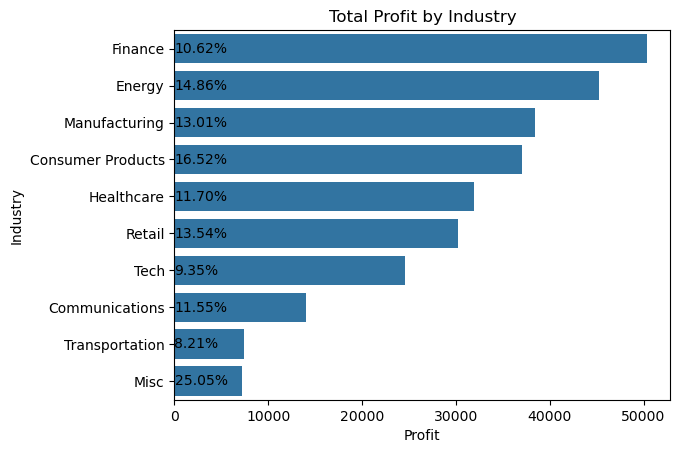

In [507]:
sns.barplot(
    data=customer_industry,
    x='Profit',
    y='Industry',
)
plt.title('Total Profit by Industry')
for index, value in enumerate(customer_industry['Profit Margin']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left')

**Performa berdasarkan Industry**:
- Industri Finance menghasilkan profit terbesar dengan total profit sebesar $50,348.97, meskipun total sales-nya tidak yang tertinggi.
- Industri Energy juga menunjukkan performa yang baik dengan total profit sebesar $45,282.31.
- Industri Manufacturing dan Consumer Products juga termasuk dalam industri yang menguntungkan dengan total profit masing-masing sebesar $38,413.11 dan $37,018.01.
- Industri Tech dan Communications menghasilkan profit yang lebih rendah dibandingkan industri lainnya, dengan total profit masing-masing sebesar $24,615.04 dan $13,976.34.
- Industri yang tergolong lain-lain memiliki profit margin tertinggi (25%) walaupun profit yang didapatkan paling rendah.



#### Top 10 Perusahaan berdasarkan Profit

In [508]:
customer_profitability = df.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount Amount': 'sum'
}).reset_index()

customer_profitability_top10 = customer_profitability.sort_values(by='Profit', ascending=False).head(10)
customer_profitability_top10['Profit Margin'] = customer_profitability_top10['Profit'] / customer_profitability_top10['Sales']*100
customer_profitability_top10

,Customer,Sales,Profit,Quantity,Discount Amount,Profit Margin
92,Valero Energy,41220.4188,10308.6297,418,2953.269536,25.008552
28,Coca-Cola,28643.8040,9449.0246,305,1620.511000,32.988023
88,Trafigura Group,33447.1270,8867.8252,359,3393.807700,26.512965
62,Mondelez International,32993.0458,8577.6524,519,2900.982946,25.998365
55,Lowes,40360.1630,7937.4915,439,4018.199200,19.666649
56,Lukoil,35199.1830,7117.0922,431,4688.427600,20.219481
80,Siemens,36008.3686,6519.5105,639,3796.219142,18.105543
16,Bank of America Corp.,41255.9471,6449.8554,530,4830.634267,15.633759
54,Kroger,29783.4590,6256.1005,534,2678.943100,21.005285
10,Anthem,55719.2100,5953.2038,523,13952.867200,10.684293


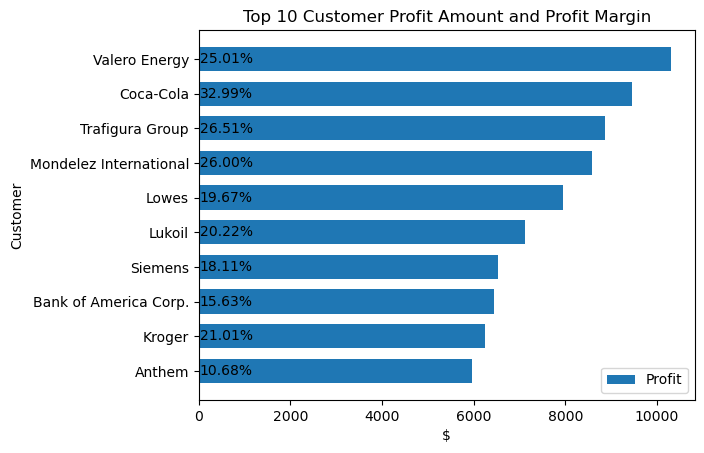

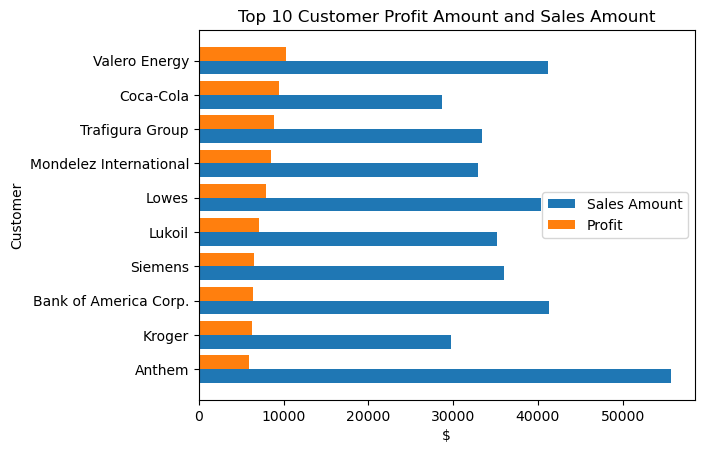

In [509]:
X = customer_profitability_top10['Customer']
profit = customer_profitability_top10['Profit'] 
discamount = customer_profitability_top10['Discount Amount'] 
salesamount = customer_profitability_top10['Sales']
  
X_axis = np.arange(len(X)) 
  
plt.barh(X_axis, profit, 0.7, label = 'Profit') 
 
plt.yticks(X_axis, X) 
plt.ylabel("Customer") 
plt.xlabel("$") 
plt.title("Top 10 Customer Profit Amount and Profit Margin") 

for index, value in enumerate(customer_profitability_top10['Profit Margin']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left')
plt.legend() 
plt.gca().invert_yaxis()
plt.show()

plt.barh(X_axis + 0.2, salesamount, 0.4, label = 'Sales Amount') 
plt.barh(X_axis - 0.2, profit, 0.4, label = 'Profit') 

plt.yticks(X_axis, X) 
plt.ylabel("Customer") 
plt.xlabel("$")
plt.title("Top 10 Customer Profit Amount and Sales Amount")  
plt.legend() 
plt.gca().invert_yaxis()
plt.show()

- **Valero Energy** adalah perusahaan dengan profit terbesar, mencapai sekitar $10,308.63.
- **Coca-Cola** dan **Trafigura Group** juga menunjukkan performa yang sangat baik dengan profit masing-masing sebesar $9,449.02 dan $8,867.83.
- **Mondelez International** dan **Lowes** juga termasuk dalam daftar perusahaan dengan profit tertinggi, masing-masing sebesar $8,577.65 dan $7,937.49.
- **Anthem** menerima diskon yang besar ($13,952.87), namun tetap menghasilkan profit yang signifikan sebesar $5,953.20.
- Semua perusahaan pada top 10 menghasilkan profit margin yang baik


#### Bottom 10 Perusahaan berdasarkan Profit

In [510]:
bottom_10_customers = customer_profitability.sort_values(by='Profit', ascending=True).head(10)
bottom_10_customers['Profit Margin'] = bottom_10_customers['Profit'] / bottom_10_customers['Sales']*100 
bottom_10_customers

,Customer,Sales,Profit,Quantity,Discount Amount,Profit Margin
5,Allstate,39941.6400,-2796.2935,411,8453.738000,-7.000948
19,Bosch,25444.9990,-1823.7794,474,5628.944900,-7.167536
66,Nissan Motor,22650.8206,-1585.1886,277,5498.588532,-6.998372
31,Costco Wholesale,21796.7020,-1354.8547,236,5742.106600,-6.215870
95,Walgreens,14420.6190,-740.6747,241,2731.249700,-5.136220
82,Sprint Nextel,18852.0750,-462.6587,370,3571.662300,-2.454153
63,Morgan Stanley,28631.4500,-361.8099,484,5937.925400,-1.263680
46,HonHai Precision Industry,18457.4150,-136.6992,407,4381.191900,-0.740619
44,HSBC Holdings,22703.8405,-104.4022,340,4787.074775,-0.459844
39,Gazprom,5402.9020,-13.9695,193,1073.270600,-0.258555


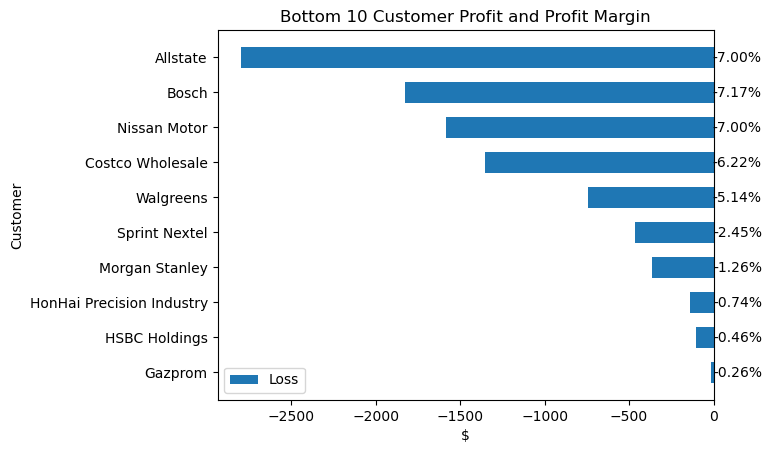

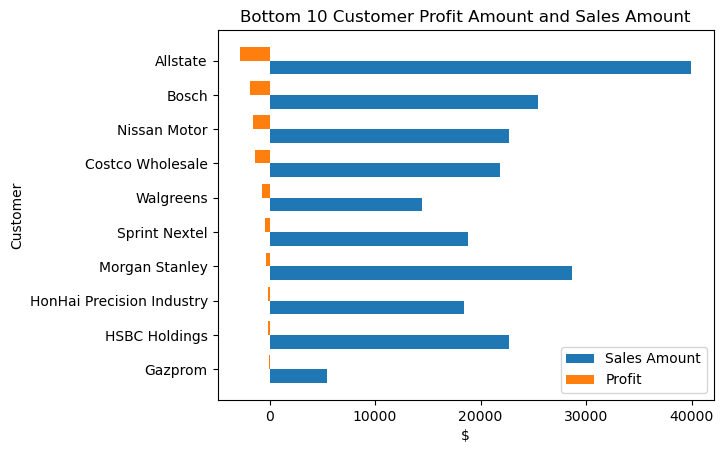

In [511]:
X = bottom_10_customers['Customer']
profit = (bottom_10_customers['Profit'] )
discamount = bottom_10_customers['Discount Amount'] 
salesamount = bottom_10_customers['Sales']
  
X_axis = np.arange(len(X)) 
  
plt.barh(X_axis , profit, 0.6, label = 'Loss') 
  
plt.yticks(X_axis, X) 
plt.ylabel("Customer") 
plt.xlabel("$") 
plt.title("Bottom 10 Customer Profit and Profit Margin") 
plt.legend() 

for index, value in enumerate(bottom_10_customers['Profit Margin']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left')

plt.gca().invert_yaxis()
plt.show()

plt.barh(X_axis + 0.2, salesamount, 0.4, label = 'Sales Amount') 
plt.barh(X_axis - 0.2, profit, 0.4, label = 'Profit') 

plt.yticks(X_axis, X) 
plt.ylabel("Customer") 
plt.xlabel("$")
plt.title("Bottom 10 Customer Profit Amount and Sales Amount")  
plt.legend() 
plt.gca().invert_yaxis()
plt.show()


- Perusahaan seperti **Allstate**, **Bosch**, dan **Nissan Motor** mengalami kerugian terbesar dengan profit masing-masing sebesar -$2,796.29, -$1,823.78, dan -$1,585.19.
- Diskon yang diberikan kepada perusahaan-perusahaan ini cukup besar, namun tidak berhasil meningkatkan profitabilitas mereka.
- Perusahaan-perusahaan ini mungkin memerlukan strategi penjualan dan diskon yang berbeda untuk meningkatkan profitabilitas mereka.


### Customer behavior per tahun

In [512]:
customer_analysis = df.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'sum'
}).reset_index()

least_profitable_customers = customer_analysis.nsmallest(5, 'Profit')

trend_data = df[df['Customer'].isin(least_profitable_customers['Customer'])]

trend_data['Discount Amount'] = trend_data['Sales'] * trend_data['Discount']
trend_data['Year'] = trend_data['Order Date'].dt.year
trend_data['Quarter'] = trend_data['Order Date'].dt.quarter
trend_data['Year-Quarter'] = trend_data['Year'].astype(str) + 'Q' + trend_data['Quarter'].astype(str)
trend_trends = trend_data.groupby(['Customer', 'Year']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount Amount': 'sum'
}).reset_index()

trend_trendsq = trend_data.groupby(['Customer', 'Year-Quarter']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount Amount': 'sum'
}).reset_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_30104\3160636288.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['Discount Amount'] = trend_data['Sales'] * trend_data['Discount']
C:\Users\Asus\AppData\Local\Temp\ipykernel_30104\3160636288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['Year'] = trend_data['Order Date'].dt.year
C:\Users\Asus\AppData\Local\Temp\ipykernel_30104\3160636288.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [513]:
trend_data

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Product,License,Sales,Quantity,Discount,Profit,Year,Quarter,Year-Quarter,Discount Amount
23,24,EMEA-2023-156909,2023-07-17,Luke Bower,France,Paris,EMEA,EU-WEST,Costco Wholesale,1025,...,FinanceHub,AJOASBK55N,71.372,2,0.3,-1.0196,2023,3,2023Q3,21.4116
75,76,APJ-2023-118038,2023-12-10,Maria Dyer,Japan,Tokyo,APJ,JAPN,Nissan Motor,1098,...,ContactMatcher,A4VC3VGTLE,1.248,3,0.8,-1.9344,2023,4,2023Q4,0.9984
76,77,APJ-2023-118038,2023-12-10,Maria Dyer,Japan,Tokyo,APJ,JAPN,Nissan Motor,1098,...,SaaS Connector Pack,IR30G9I4WJ,9.708,3,0.6,-5.8248,2023,4,2023Q4,5.8248
77,78,APJ-2023-118038,2023-12-10,Maria Dyer,Japan,Tokyo,APJ,JAPN,Nissan Motor,1098,...,Marketing Suite - Gold,PGTVTGM7XI,27.240,3,0.2,2.7240,2023,4,2023Q4,5.4480
95,96,EMEA-2023-109484,2023-11-07,Peter Quinn,Belgium,Brussels,EMEA,EU-WEST,Walgreens,1095,...,ContactMatcher,VK1TWXDWUR,5.682,1,0.7,-3.7880,2023,4,2023Q4,3.9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,9810,EMEA-2020-139640,2020-11-07,Owen Ferguson,Belgium,Brussels,EMEA,EU-WEST,Nissan Motor,1098,...,Support,BXG754B9J8,25.920,5,0.2,9.0720,2020,4,2020Q4,5.1840
9810,9811,EMEA-2020-139640,2020-11-07,Owen Ferguson,Belgium,Brussels,EMEA,EU-WEST,Nissan Motor,1098,...,ChatBot Plugin,VWLAFO1GDX,120.768,4,0.2,9.0576,2020,4,2020Q4,24.1536
9829,9830,EMEA-2023-152842,2023-07-17,Sean Rees,Sweden,Stockholm,EMEA,NOR,Walgreens,1095,...,FinanceHub,5LSIDMWDXH,242.352,3,0.2,15.1470,2023,3,2023Q3,48.4704
9886,9887,APJ-2020-146997,2020-01-24,Michael Lewis,India,Mumbai,APJ,IND,Nissan Motor,1098,...,Storage,9XWX0LE7EB,5.940,3,0.0,0.0000,2020,1,2020Q1,0.0000


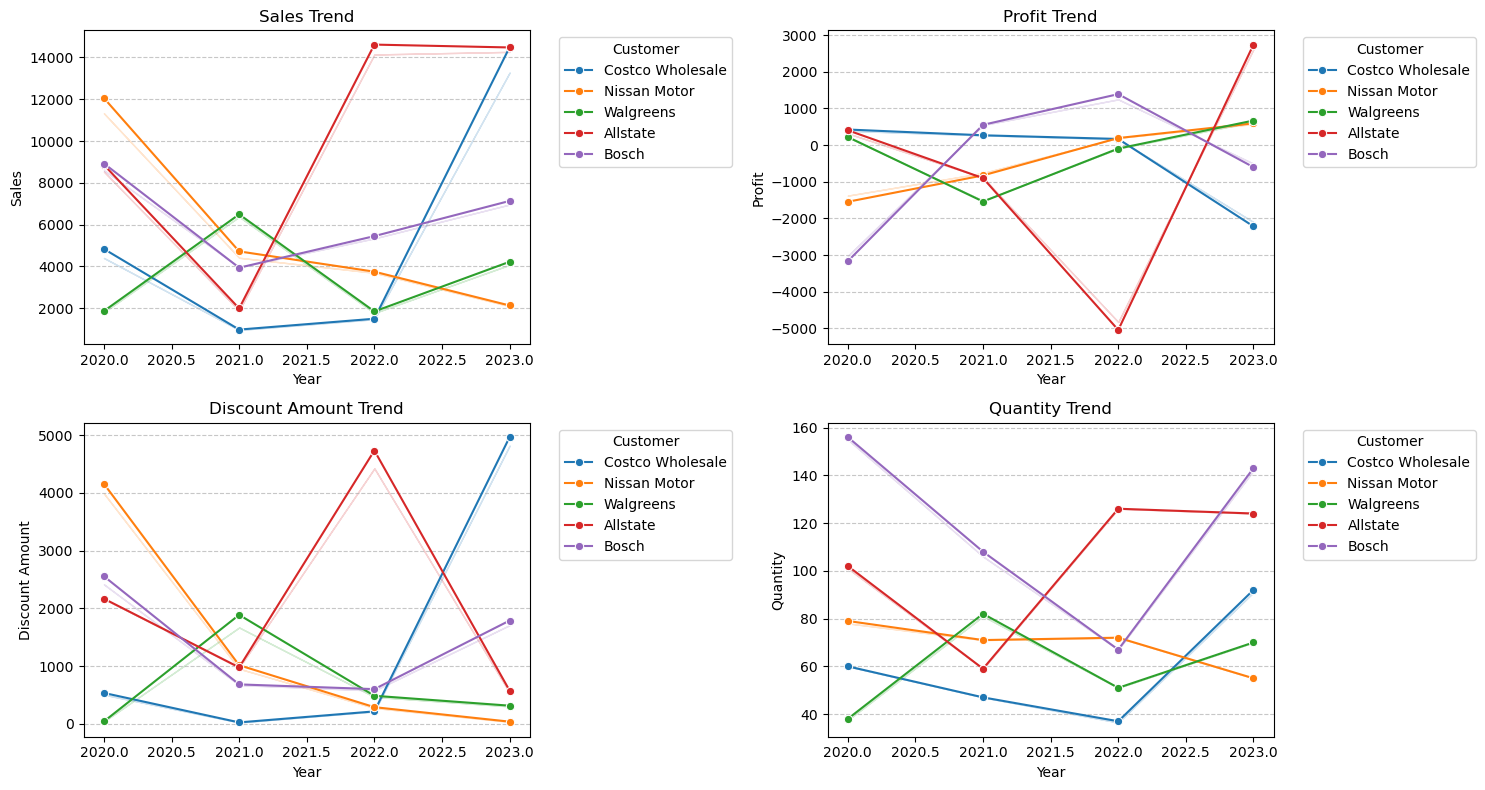

In [520]:
plt.figure(figsize=(15, 8))
metrics = ['Sales', 'Profit', 'Discount Amount', 'Quantity']
titles = ['Sales Trend', 'Profit Trend', 'Discount Amount Trend', 'Quantity Trend']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        data=trend_data,
        x='Year',
        y=metric,
        hue='Customer',
        marker='o',
        errorbar=('ci', 0),
        estimator='sum'
    )
    plt.title(titles[i-1])
    plt.ylabel(metric)
    plt.xlabel('Year')
    plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


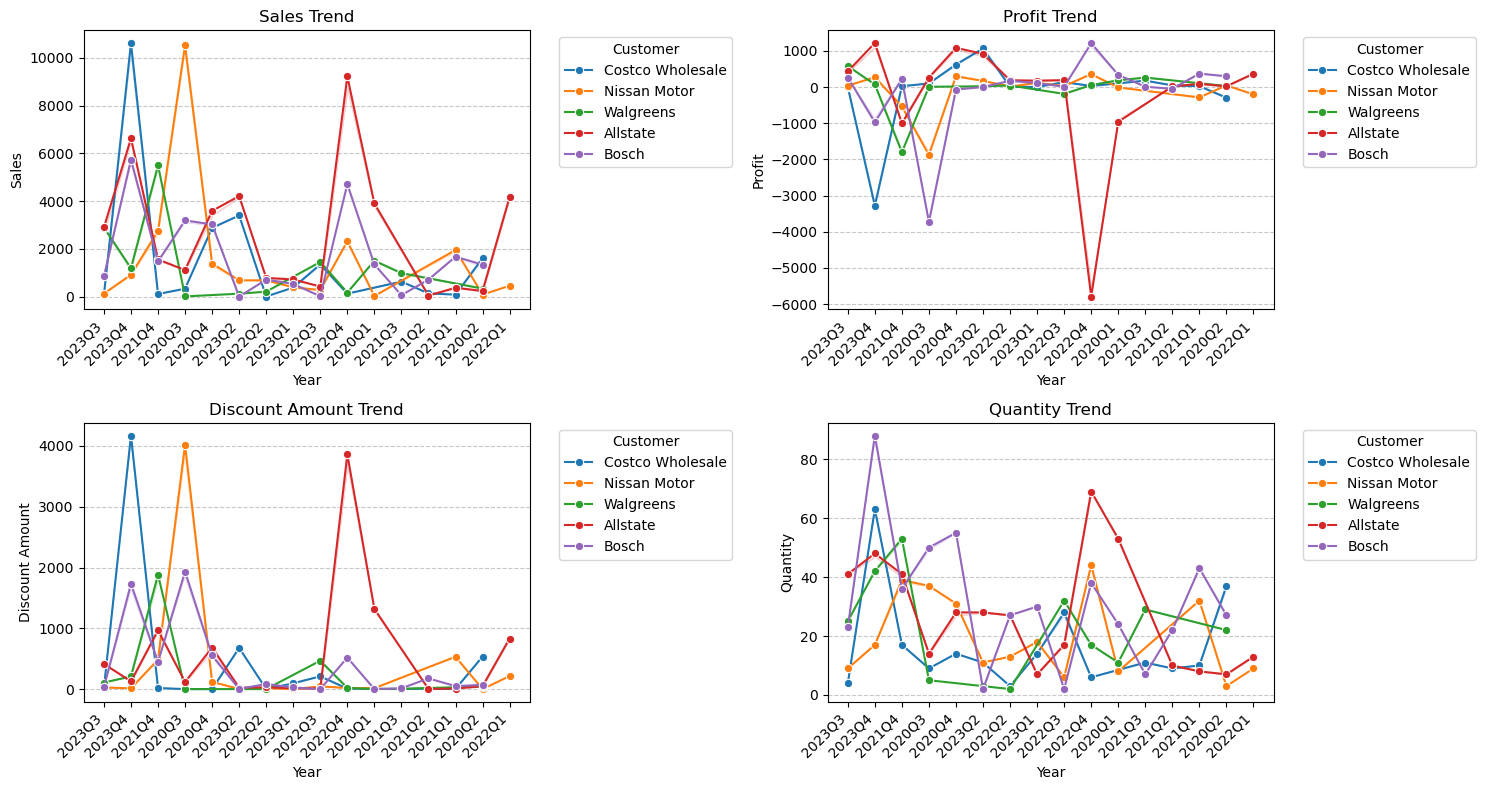

In [532]:
plt.figure(figsize=(15, 8))
metrics = ['Sales', 'Profit', 'Discount Amount', 'Quantity']
titles = ['Sales Trend', 'Profit Trend', 'Discount Amount Trend', 'Quantity Trend']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        data=trend_data,
        x='Year-Quarter',
        y=metric,
        hue='Customer',
        marker='o',
        errorbar=('ci', 0),
        estimator='sum'
    )
    plt.title(titles[i-1])
    plt.ylabel(metric)
    plt.xlabel('Year')

    plt.xticks(rotation=45 ,ha = 'right')
    plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



- Beberapa pelanggan menunjukkan peningkatan profitabilitas dari tahun ke tahun, sementara yang lain tetap tidak menguntungkan meskipun ada perubahan dalam strategi diskon.
- Allstate dan Bosch menunjukkan fluktuasi yang signifikan dalam profitabilitas mereka, dengan beberapa tahun menghasilkan profit dan tahun lainnya mengalami kerugian.
- Nissan Motor dan Walgreens menunjukkan tren yang lebih stabil, meskipun tetap ada fluktuasi dalam profitabilitas mereka.
- Strategi diskon yang diterapkan memiliki dampak yang bervariasi, menunjukkan bahwa pendekatan yang lebih terfokus dan disesuaikan diperlukan untuk meningkatkan profitabilitas


# Kesimpulan dan Rekomendasi

## Kesimpulan

1. Keuntungan total yang diterima perusahaan secara total adalah $286,397.02. Keuntungan per tahunnya menunjukkan tren positif, dengan peningkatan yang signifikan setiap tahunnya. Dalam satu tahun, terdapat pola kenaikan dari awal tahun (Q1) hingga akhir tahun (Q4), lalu turun drastis pada Q1 tahun berikutnya.

2. Customer yang bergerak di bidang Finance merupakan segmen customer yang paling menguntungkan dengan profit $50,348.96. Customer yang paling menguntungkan adalah **Valero Energy** dengan total profit sebesar $10,308.63. Customer yang paling merugikan adalah **Allstate** dengan total kerugian sebesar -$2,796.29.

3. Profit per tahun dari masing-masing customer menunjukkan bahwa beberapa customer mengalami peningkatan profitabilitas dari tahun ke tahun, sementara yang lain tetap tidak menguntungkan meskipun ada perubahan dalam strategi diskon. Misalnya, **Allstate** dan **Bosch** menunjukkan fluktuasi yang signifikan dalam profitabilitas mereka.

4. Diskon memiliki pengaruh terhadap profit dan kuantitas penjualan. Diskon yang lebih tinggi cenderung menghasilkan profit yang lebih rendah atau bahkan kerugian. Namun, ada juga customer yang menerima diskon besar tetapi tetap menghasilkan profit yang signifikan, seperti **Anthem**.

## Rekomendasi

- Pengoptimalan strategi diskon:
    - Perusahaan memberikan diskon besar kepada **Allstate** namun tetap mengalami kerugian sebesar -$2,796.29. Sebaiknya di evaluasi ulang strategi diskon untuk Allstate dan memberikan diskon hanya jika ada potensi peningkatan volume penjualan yang signifikan.

- Evaluasi ulang customer yang merugikan:
    - Bosch mengalami kerugian sebesar -$1,823.78. Perusahaan perlu mengevaluasi transaksi dengan Bosch untuk mencari tahu penyebab kerugian dan mengubah strategi penjualan jika diperlukan, seperti mengurangi diskon atau menawarkan produk yang lebih sesuai dengan kebutuhan mereka.

- Tingkatkan penjualan awal tahun:
    - Penjualan pada Q1 cenderung lebih rendah dibandingkan kuartal lainnya. Perusahaan dapat meluncurkan promosi atau kampanye pemasaran khusus di awal tahun untuk mengurangi penurunan penjualan pada Q1, seperti menawarkan diskon awal tahun atau bundling produk.

- Analisis customer dengan diskon besar:
    - Anthem menerima diskon besar sebesar $13,952.87 namun tetap menghasilkan profit sebesar $5,953.20. Perusahaan dapat menganalisis strategi diskon yang diterapkan pada Anthem dan mencoba menerapkannya pada customer lain yang berpotensi meningkatkan profitabilitas meskipun menerima diskon besar.

- Mempertahankan dan mengembangkan hubungan dengan customer menguntungkan:
    - Valero Energy adalah customer dengan profit terbesar, mencapai sekitar $10,308.63. Perusahaan dapat memperkuat hubungan dengan Valero Energy melalui program loyalitas dan penawaran eksklusif untuk memastikan mereka tetap menjadi customer yang setia dan menguntungkan.
